<a href="https://colab.research.google.com/github/trish-r/102203584_Trish_Rustagi_PyCaret/blob/main/102203584_Trish_Rustagi_Topsis_For_Pretrained_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install scikit-learn matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = {
    'Model': ['ChatGPT', 'Claude', 'Gemini', 'Mistral', 'LLaMA'],
    'Dialog Quality (DQ)': [85, 80, 78, 82, 79],
    'Engagement Score (ES)': [0.92, 0.88, 0.85, 0.90, 0.86],
    'Response Time (RT)': [1.2, 1.5, 1.1, 1.3, 1.4],
    'Memory Usage (MU)': [9, 10, 8, 9.5, 9.2]
}

df = pd.DataFrame(data)
df.head()


,Model,Dialog Quality (DQ),Engagement Score (ES),Response Time (RT),Memory Usage (MU)
0,ChatGPT,85,0.92,1.2,9.0
1,Claude,80,0.88,1.5,10.0
2,Gemini,78,0.85,1.1,8.0
3,Mistral,82,0.90,1.3,9.5
4,LLaMA,79,0.86,1.4,9.2


In [5]:
weights = np.array([1, 1, -1, -1])
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df.iloc[:, 1:])
df_normalized = pd.DataFrame(normalized_data, columns=df.columns[1:], index=df['Model'])
print(df_normalized)
weighted_normalized_data = normalized_data * weights
df_weighted_normalized = pd.DataFrame(weighted_normalized_data, columns=df.columns[1:], index=df['Model'])
print(df_weighted_normalized)


         Dialog Quality (DQ)  Engagement Score (ES)  Response Time (RT)  \
Model                                                                     
ChatGPT             1.692228               1.483651           -0.707107   
Claude             -0.322329              -0.078087            1.414214   
Gemini             -1.128152              -1.249390           -1.414214   
Mistral             0.483494               0.702782            0.000000   
LLaMA              -0.725241              -0.858956            0.707107   

         Memory Usage (MU)  
Model                       
ChatGPT          -0.211443  
Claude            1.298863  
Gemini           -1.721748  
Mistral           0.543710  
LLaMA             0.090618  
         Dialog Quality (DQ)  Engagement Score (ES)  Response Time (RT)  \
Model                                                                     
ChatGPT             1.692228               1.483651            0.707107   
Claude             -0.322329              -0.0

In [6]:
ideal_best = np.max(weighted_normalized_data, axis=0)
ideal_worst = np.min(weighted_normalized_data, axis=0)
distance_best = np.sqrt(((weighted_normalized_data - ideal_best) ** 2).sum(axis=1))
distance_worst = np.sqrt(((weighted_normalized_data - ideal_worst) ** 2).sum(axis=1))
print(distance_best)
print(distance_worst)


[1.66763962 4.86020098 3.92734741 3.03366022 4.37225711]
[4.7122266  1.42172496 4.1381261  2.99643683 1.50818789]


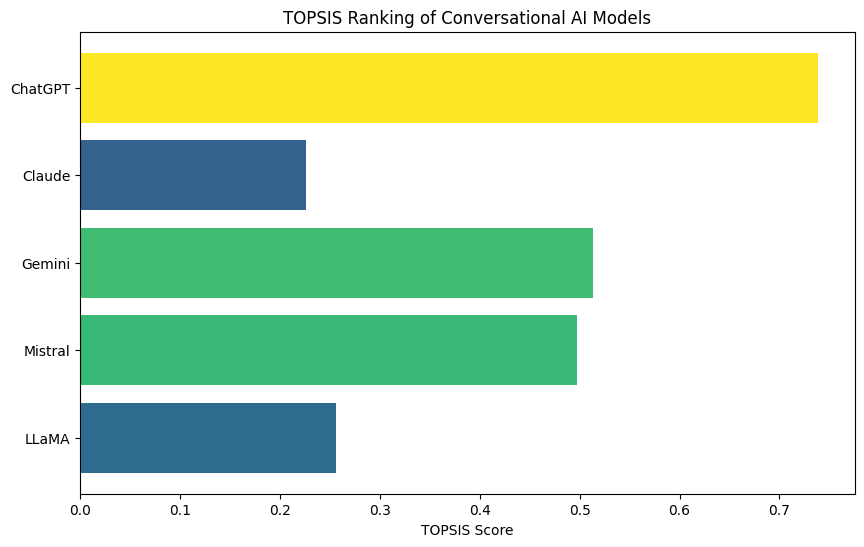


Final Ranked Results:
     Model  TOPSIS Score  Rank
0  ChatGPT      0.738609   1.0
2   Gemini      0.513067   2.0
3  Mistral      0.496914   3.0
4    LLaMA      0.256475   4.0
1   Claude      0.226320   5.0


In [7]:
topsis_scores = distance_worst / (distance_best + distance_worst)
df['TOPSIS Score'] = topsis_scores
df['Rank'] = df['TOPSIS Score'].rank(ascending=False)

plt.figure(figsize=(10,6))
plt.barh(df['Model'], df['TOPSIS Score'], color=plt.cm.viridis(topsis_scores / max(topsis_scores)))
plt.xlabel('TOPSIS Score')
plt.title('TOPSIS Ranking of Conversational AI Models')
plt.gca().invert_yaxis()
plt.show()

print("\nFinal Ranked Results:")
print(df[['Model', 'TOPSIS Score', 'Rank']].sort_values(by='Rank'))